In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, 0, regex=True)
    
    
    return filtered_df

In [12]:
proyectos = read_csv("data/mapeo_proyectos.csv")

In [13]:
proyectos["Financiación"] = pd.to_numeric(proyectos["Financiación"], errors='coerce')

In [22]:
mini = proyectos[["ID proyecto","Financiación", "Temporalización (inicio)"]] 
mini = mini.groupby(['ID proyecto','Temporalización (inicio)'])["Financiación"].apply(list).reset_index(name='Financiación')
new_fins = [fin[0] for fin in mini["Financiación"]]
mini["Financiación"] = new_fins
mini

,ID proyecto,Temporalización (inicio),Financiación
0,141,2015.0,0.0
1,150,2013.0,33000.0
2,153,1999.0,0.0
3,155,2016.0,83000.0
4,157,2014.0,48400.0
...,...,...,...
363,2412,2019.0,126566.0
364,2413,2019.0,67760.0
365,2414,2019.0,35695.0
366,2415,2019.0,70301.0


# Cómo ha evolucionado la financiación en el tiempo:

In [168]:
grouped = mini.groupby("Temporalización (inicio)", as_index=False)
df2 = grouped.agg({'Financiación':['sum', 'mean', 'count']})
df2.columns = ["inicio", "sum", "mean", "count"]
df2 = df2.drop(0)
df2.set_index("inicio")

df2['inicio'] = pd.to_numeric(df2['inicio'], downcast='signed', errors='coerce')
df2 = df2.fillna(0)
df2.astype({'inicio': 'int32'}).dtypes
df2

,inicio,sum,mean,count
1,1993,16828.0,16828.000000,1
2,1995,55952.0,27976.000000,2
3,1996,57397.0,28698.500000,2
4,1998,40238.0,40238.000000,1
5,1999,55894.0,27947.000000,2
6,2000,30050.0,15025.000000,2
7,2003,85880.0,85880.000000,1
8,2004,278300.0,23191.666667,12
9,2005,281710.0,46951.666667,6
10,2006,371340.0,37134.000000,10


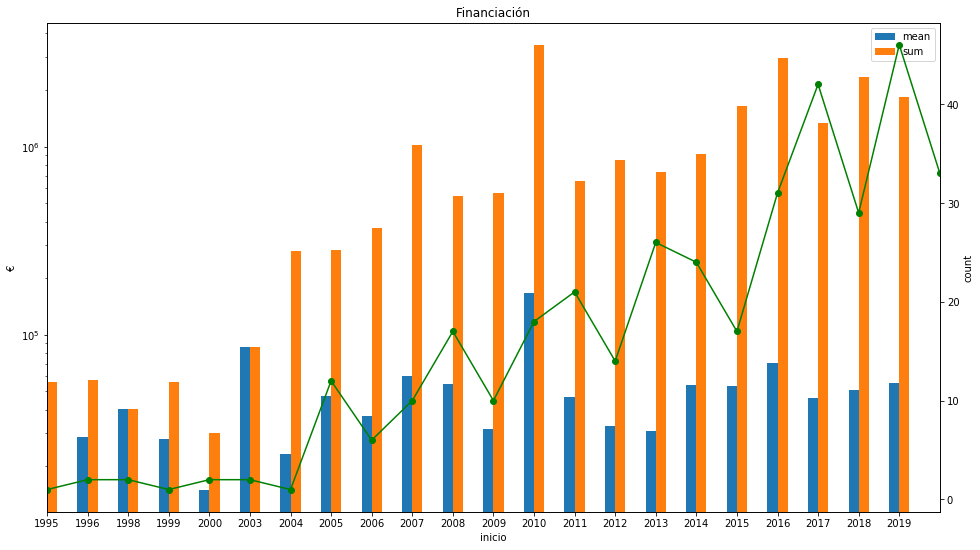

In [193]:

ax1 = df2[['inicio','mean', 'sum']].plot(x='inicio', kind="bar", figsize=(16,9), title="Financiación", logy=True)
# df2.plot(x="inicio", y="sum", kind="bar")
ax1.set_ylabel("€")

ax2 = df2['count'].plot(secondary_y=True, color='g', marker='o')
ax2.set_ylabel('count')

plt.show()

'0.25.3'